In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression

Logistic regression is a supervised learning algorithm used to predict a dependent categorical target variable. In essence, if you have a large set of data that you want to categorize, logistic regression may be able to help.  
There are **three** main types of logistic regression: **binary**, **multinomial** and **ordinal**.

## Binary logistic regression
---
There are just **two possible outcome** answers. This concept is typically represented as a **0 or a 1** in coding. Examples include:

* Whether or not to lend to a bank customer (outcomes are yes or no).
* Assessing cancer risk (outcomes are high or low).
* Will a team win tomorrow’s game (outcomes are yes or no).


### DATA

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


<AxesSubplot:>

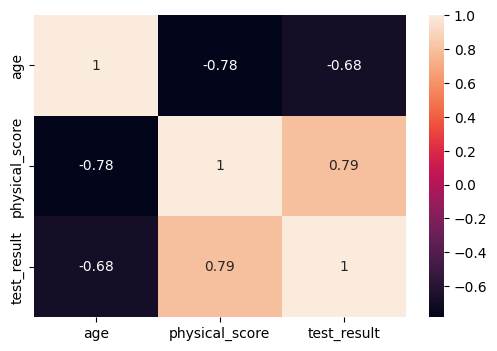

In [5]:
plt.figure(dpi=100)
sns.heatmap(df.corr(), annot=True)

In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

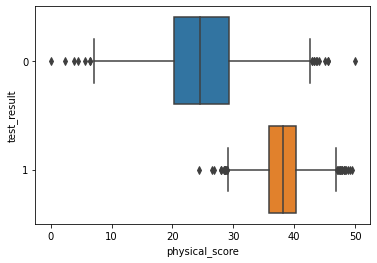

In [8]:
sns.boxplot(data=df, x='physical_score', y='test_result', orient='h')

<AxesSubplot:xlabel='age', ylabel='test_result'>

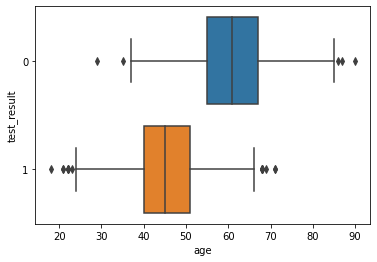

In [9]:
sns.boxplot(data=df, x='age', y='test_result', orient='h')

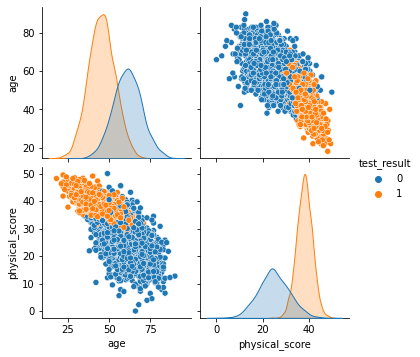

In [10]:
sns.pairplot(data=df, hue='test_result')

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

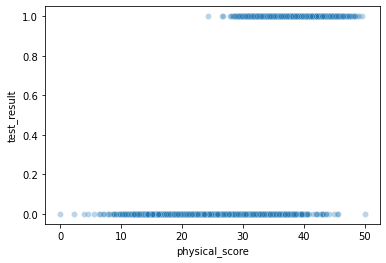

In [11]:
sns.scatterplot(data=df, x='physical_score', y='test_result', alpha=0.3)

<AxesSubplot:xlabel='age', ylabel='test_result'>

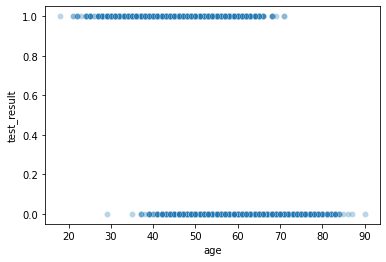

In [12]:
sns.scatterplot(data=df, x='age', y='test_result', alpha=0.3)

more intuitive plot, 3D plot

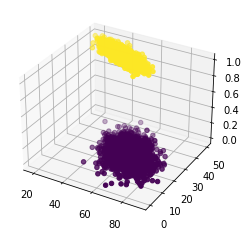

In [13]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

perfectly seperated

### Model


#### Train | Test split

In [16]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model
The Logistic Function is:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5e648e1dd38ef843d57777cd34c67465bbca694f">
Let us assume that *t* is a linear function of a single explanatory variable *x* (the case where *t* is a *linear combination of multiple explanatory variables* is treated similarly). We can then express *t* as follows: 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/836d93163447344be4715ec00638c1cd829e376c">
And the general logistic function ${\displaystyle p:\mathbb {R} \rightarrow (0,1)}$ can now be written as: 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e376fe69caee24c914fab1360de36900b7bb9c24">

In [20]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [25]:
# help(LogisticRegression)
# help(LogisticRegressionCV)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* Note:  
    The **‘newton-cg’**, **‘sag’**, and **‘lbfgs’** solvers support only **L2** regularization with *primal formulation*, or *no regularization*.

    The **‘liblinear’** solver supports **both L1 and L2 regularization**, with a *dual formulation only for the L2 penalty*.

    The **Elastic-Net** regularization is only supported by the **‘saga’** solver.

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [74]:
print(log_model.classes_)
print(log_model.C)
print(log_model.penalty)

[0 1]
1.0
l2


**Coefficient Interpretation**

Things to remember:

* These coeffecients relate to the ***odds*** and can not be directly interpreted as in linear regression.
* We trained on a ***scaled*** version of the data 
* It is much easier to understand and interpret the ***relationship between the coefficients*** than it is to interpret the *coefficients relationship with the probability of the target/label* class.

***Odds***

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8b5acc9cf67be7974971e0f520029f356969ba90">
For a continuous independent variable the odds ratio can be defined as: 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/451dc30a46a3fd5beb6c48b9de8bed20a8b7f0d3">

This exponential relationship provides an interpretation for $\beta _{1}$: The odds multiply by ${e^ {\beta_1} }$ for every 1-unit increase in x.

In [76]:
print(log_model.coef_)

[[-0.94953524  3.45991194]]


This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

***Model Performance***

In [41]:
y_pred = log_model.predict(X_test)

In [46]:
log_model.predict_log_proba(X_test)[0]

array([-3.73624645, -0.02413229])

In [47]:
y_prob = log_model.predict_proba(X_test)

In [78]:
def predict(i):
    return print(f'The model predicts {y_pred[i]}, with {y_prob[i][1]*100:.3}% assurance to be 1 and {y_prob[i][0]*100:.3}% to be 0' )

In [79]:
predict(100)

The model predicts 1, with 99.7% assurance to be 1 and 0.305% to be 0


#### Model Evaluation

<img src="https://i.postimg.cc/cLLzYNRh/Screenshot-2022-09-05-200550.jpg">

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

**Accuracy Score**

In [81]:
accuracy_score(y_test, y_pred)

0.93

**Confusion Matrix**

In [82]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

C:\Users\rafes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


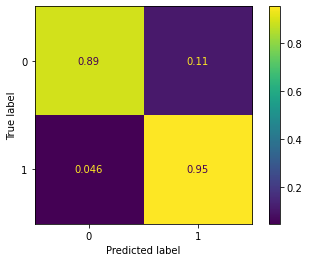

In [100]:
plot_confusion_matrix(estimator=log_model, X=X_test, y_true=y_test, normalize='true');

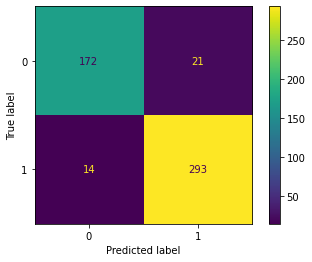

In [98]:
# Warning suggests this

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();

***Classification Report***  
With this we dont need to import recall or f1-score

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [112]:
# Predict 
# Age = 70 , physical_score = 20

print(log_model.predict([[70,20]]))
print(log_model.predict_proba([[70,20]]))

[1]
[[0.03844049 0.96155951]]


#### Evaluation Curves

In [113]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay

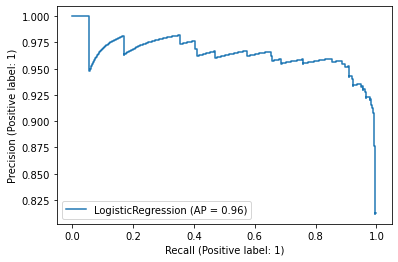

In [128]:
PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test)

C:\Users\rafes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


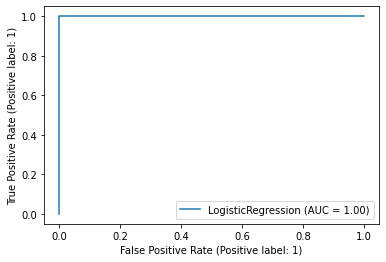

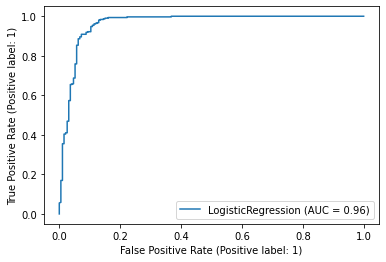

In [136]:
RocCurveDisplay.from_estimator(log_model, X_test, y_pred)

## IDK why there there is a difference !!!!

from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_model, X_test, y_test);

------
------
------

## Multinomial Logistic Regression
---

Multinomial logistic regression is a model where there are multiple classes that an item can be classified as. There is a set of three or more predefined classes set up prior to running the model. Examples include:

* Classifying texts into what language they come from.
* Predicting whether a student will go to college, trade school or into the workforce.
* Does your cat prefer wet food, dry food or human food?



### DATA

In [150]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X = pd.DataFrame(X, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(y, columns=['species'])

In [158]:
df = pd.concat([X, y], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [161]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [164]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

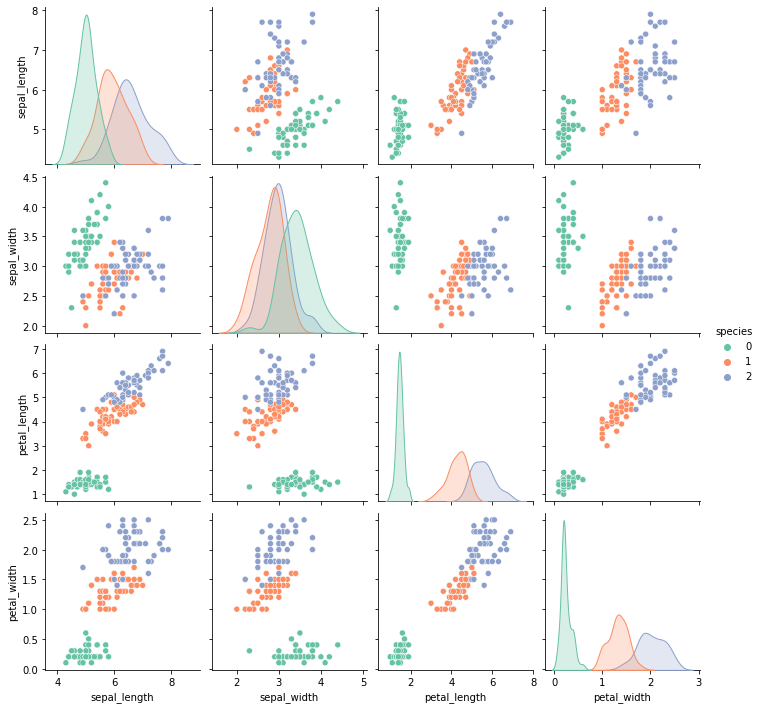

In [184]:
sns.pairplot(data=df, hue='species', palette='Set2')

The 0 class(setosa) has an obvious difference from two other classes

<AxesSubplot:>

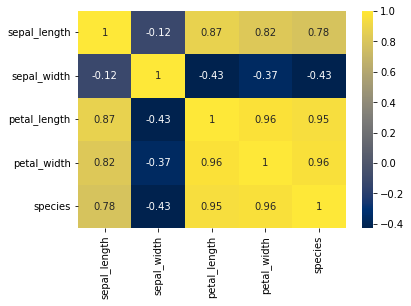

In [193]:
sns.heatmap(df.corr(), annot=True, cmap='cividis')

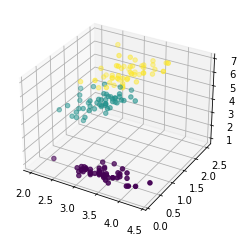

In [206]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map(str).map({'0':0, '1':1, '2':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'], c=colors);

### Model


#### Train | Test Split

In [292]:
X=df.drop('species', axis=1)
y = df['species']

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.25)

In [294]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Multinomial logistic regression model

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [296]:
penalty = ['l1', 'l2']
C = np.linspace(1,10, 10)
param_grid = {'penalty':penalty, 'C': C}

In [306]:
log_model = LogisticRegression(solver='liblinear', verbose=0, max_iter=5000, multi_class='ovr')

In [307]:
grid_model = GridSearchCV(log_model, param_grid)

In [308]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'penalty': ['l1', 'l2']})

In [309]:
grid_model.best_estimator_

LogisticRegression(C=9.0, max_iter=5000, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [310]:
grid_model.classes_

array([0, 1, 2])

In [315]:
pd.DataFrame(grid_model.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001572,0.000439,0.000719,0.000241,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.956522,0.869565,0.818182,0.954545,0.954545,0.910672,0.056914,13
1,0.001218,0.000324,0.000434,0.000467,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.913043,0.782609,0.818182,0.909091,0.954545,0.875494,0.064343,20
2,0.001371,0.000440,0.000458,0.000429,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",0.956522,0.956522,0.863636,0.954545,0.954545,0.937154,0.036770,3


In [316]:
y_pred = grid_model.predict(X_test)

In [317]:
y_prob = grid_model.predict_proba(X_test)

In [318]:
def predict(i):
    return print(f'The model predicts {y_pred[i]}, with {y_prob[i][2]*100:.3}% assurance to be 2, {y_prob[i][1]*100:.3}% assurance to be 1 and {y_prob[i][0]*100:.3}% to be 0' )

In [319]:
predict(25)

The model predicts 1, with 0.109% assurance to be 2, 87.3% assurance to be 1 and 12.6% to be 0


#### Model Performance

***Accuracy Score***

In [320]:
accuracy_score(y_test, y_pred)

0.9736842105263158

***Confusion Matrix***

In [321]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

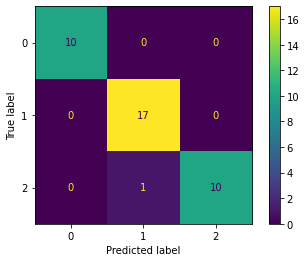

In [322]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [323]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      1.00      0.97        17
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



#### Evaluating Curves and AUC

In [326]:
from sklearn.metrics import roc_curve, auc

In [327]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

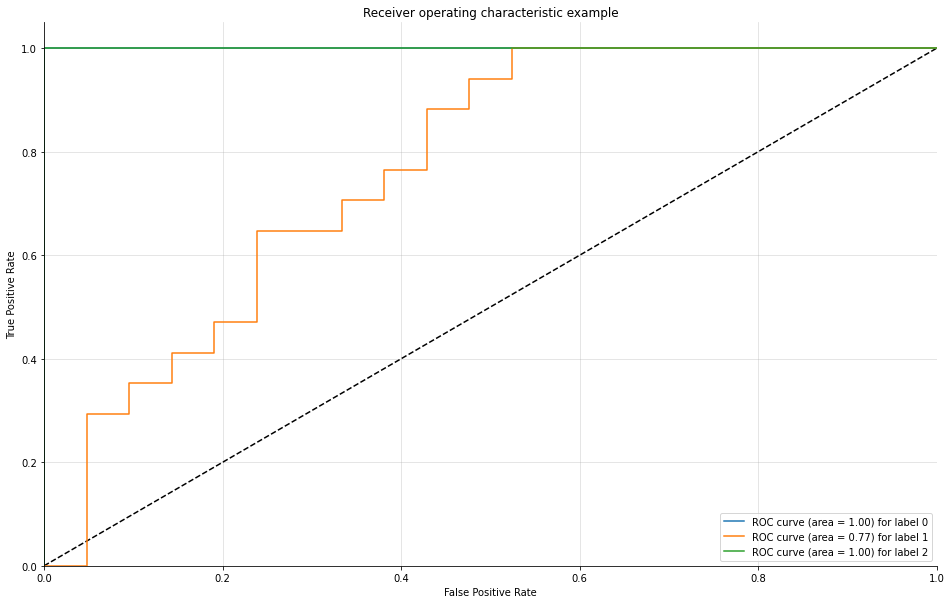

In [328]:
plot_multiclass_roc(grid_model, X_test, y_test, n_classes=3, figsize=(16, 10))